# Author:-Hemant Ramkisan Bhutada

# Instagram Post Reach Prediction i.e (No of Likes)

In [118]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/WidhyaOrg/datasets/master/instagram_reach.csv")
df

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


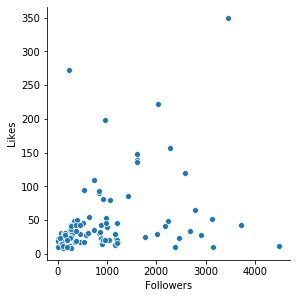

In [120]:
#seeing tha visualization between followers and likes
sns.pairplot(df, x_vars=['Followers'], y_vars='Likes',size=4, aspect=1, kind='scatter')
plt.show()

In [3]:
#checking the null values
df.isnull().sum()

Unnamed: 0           0
S.No                 0
USERNAME             0
Caption              6
Followers            0
Hashtags             0
Time since posted    0
Likes                0
dtype: int64

In [4]:
#filll the null values with zero
df.fillna(0)

,Unnamed: 0,S.No,USERNAME,Caption,Followers,Hashtags,Time since posted,Likes
0,0,1,mikequindazzi,Who are #DataScientist and what do they do? >>...,1600,#MachineLearning #AI #DataAnalytics #DataScien...,11 hours,139
1,1,2,drgorillapaints,We all know where it’s going. We just have to ...,880,#deck .#mac #macintosh#sayhello #apple #steve...,2 hours,23
2,2,3,aitrading_official,Alexander Barinov: 4 years as CFO in multinati...,255,#whoiswho #aitrading #ai #aitradingteam#instat...,2 hours,25
3,3,4,opensourcedworkplace,sfad,340,#iot #cre#workplace #CDO #bigdata #technology#...,3 hours,49
4,4,5,crea.vision,Ever missed a call while your phone was chargi...,304,#instamachinelearning #instabigdata#instamarke...,3 hours,30
...,...,...,...,...,...,...,...,...
95,8,19,michaelgarza__,"328 S. Wetherly Drive, Beverly Hills, CA 90212...",614,#beverlyhills #realestate#losangelesrealestate...,3 hours,31
96,9,21,dvlp_search,Credit @tristankappel To find more dvlp follow...,450,#workspace #work #developer#development #devel...,3 hours,42
97,10,22,ecom.space,We are coming up with the Best 21 Books that w...,182,#books #book #motivation #inspiration #life#bo...,3 hours,10
98,11,24,lb3enterprises,We’re only paid to move dirt once. It’s not ju...,2039,#heavyequipment #underconstruction#dozer #real...,3 hours,222


In [110]:
df=pd.get_dummies(df)

In [111]:

X=df.iloc[:,:-1]
y=df["Likes"]



In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [114]:
from sklearn.linear_model import LinearRegression
lin_regressor=LinearRegression()
lin_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [115]:
y_pred = lin_regressor.predict(X_test)
y_pred

array([ 24.99997076,  42.99999638,  25.00013624, 348.99364439,
       118.99813991,  20.00040271,  29.00016018,  10.00055425,
        64.99961193,  31.00041035,  24.00034746,  12.00056871,
        12.00047141,  93.99961904,  85.99891   ,  89.99883217,
        20.00011507,  10.00031933,  30.00014272,  22.00031204,
        80.9990203 ,  27.00022592,  48.99961399,  49.9997923 ,
        31.00010315,  43.00006806,  35.00014878, 108.9986975 ,
        31.0000726 ,  11.00051225,  16.00029294,  28.00010161,
        32.00014516,  19.00044335, 156.99743586, 147.99815839,
        30.00012034,  17.00030684,  16.00078775,  35.00000152])

In [116]:
#accuracy of testing prediction i.e R-squared
acc_LR=lin_regressor.score(X_test,y_test)
print(acc_LR)

0.9999999995696982


In [117]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, prediction_linear))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, prediction_linear))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,prediction_linear)))

Mean Absolute Error: 0.0006456953305093549
Mean Squared Error: 1.5624361415696269e-06
Root Mean Squared Error: 0.00124997445636686
